In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

import constants as C
import visualisations as V

from importlib import reload
reload(V)

In [3]:
hunters = pd.read_csv('output_data/hunters.csv')
gatherers = pd.read_csv('output_data/gatherers.csv')

In [3]:
V.run_all_area_metric_plots(hunters, gatherers)

In [6]:
results = V.run_all_area_barplots_and_models(
    hunters,
    gatherers,
    save_plots=True,
    save_tables=True,
)

In [4]:
V.run_all_simplified_visit_matrices(
    hunters=hunters,
    gatherers=gatherers,
    drop_question=False,
    kinds=("label", "location"),
    which_list=("first", "last"),
    output_root="plots/simpl_visit_matrices",
    save=True,
    show=True,
)

52.8% of hunters participants had a dominant strategy (>50% of trials) before completion.
55.0% of hunters participants had a dominant strategy (>50% of trials) after completion.


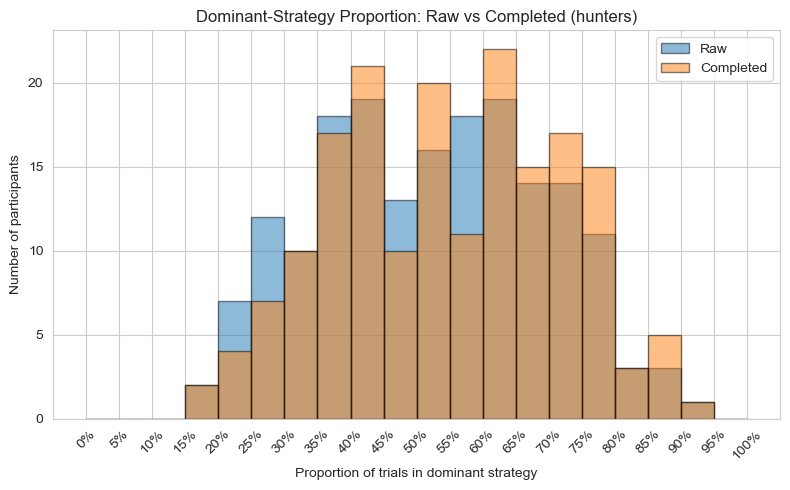

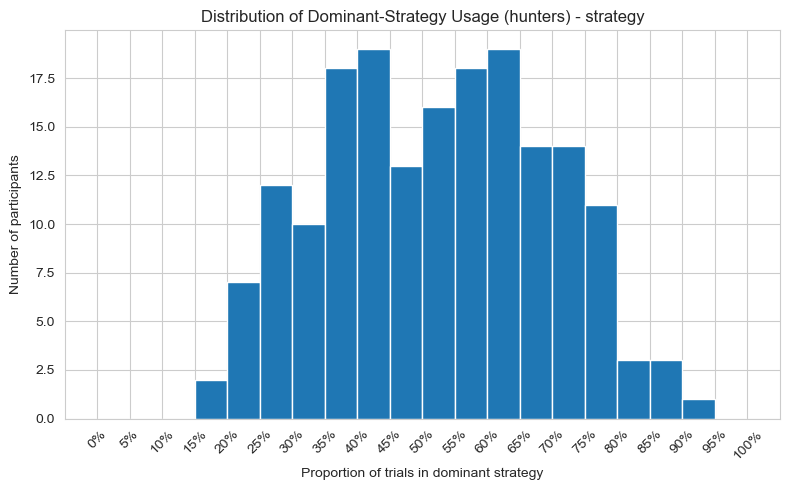

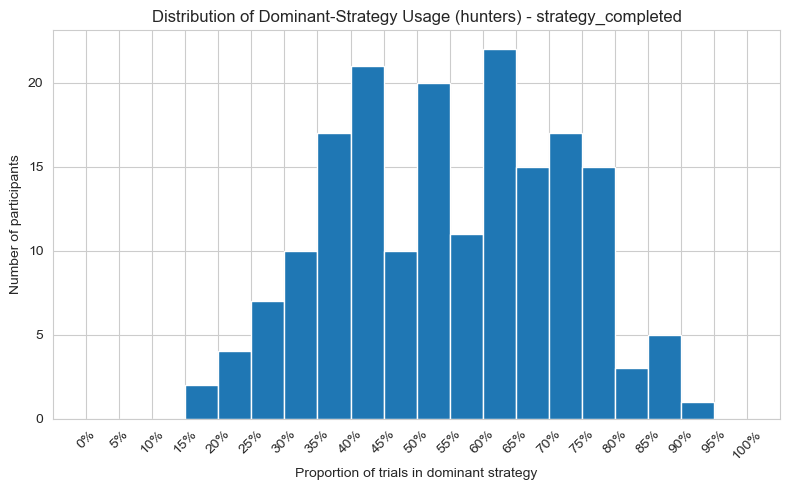

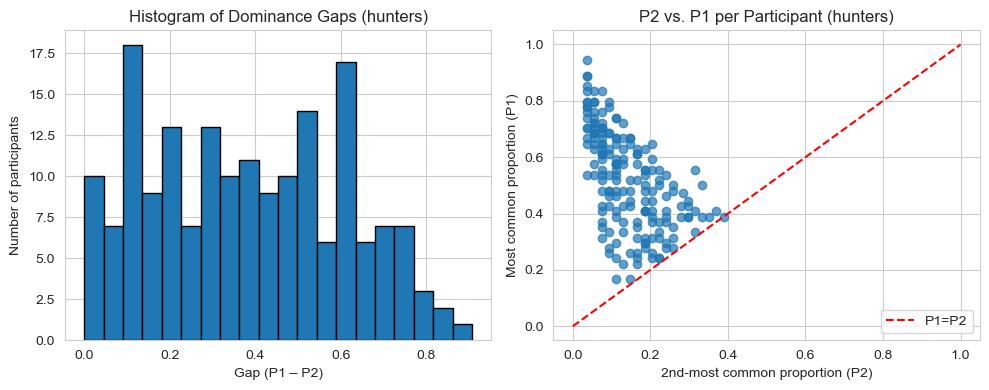

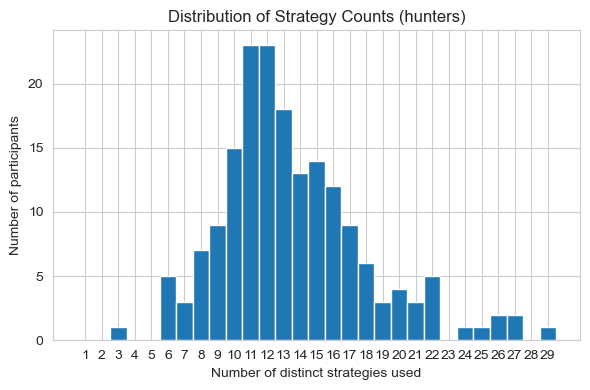

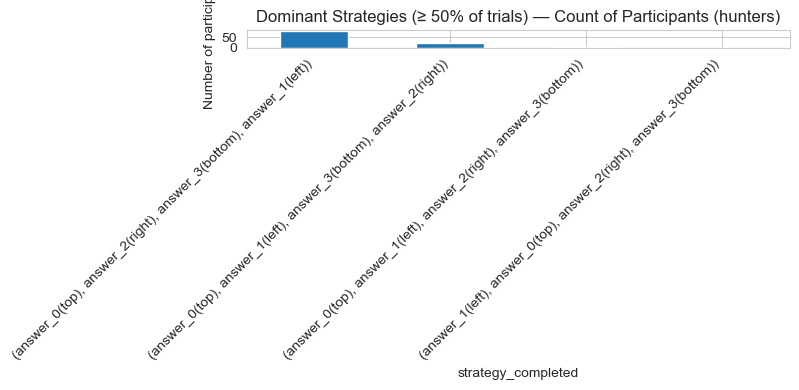

60.6% of gatherers participants had a dominant strategy (>50% of trials) before completion.
62.2% of gatherers participants had a dominant strategy (>50% of trials) after completion.


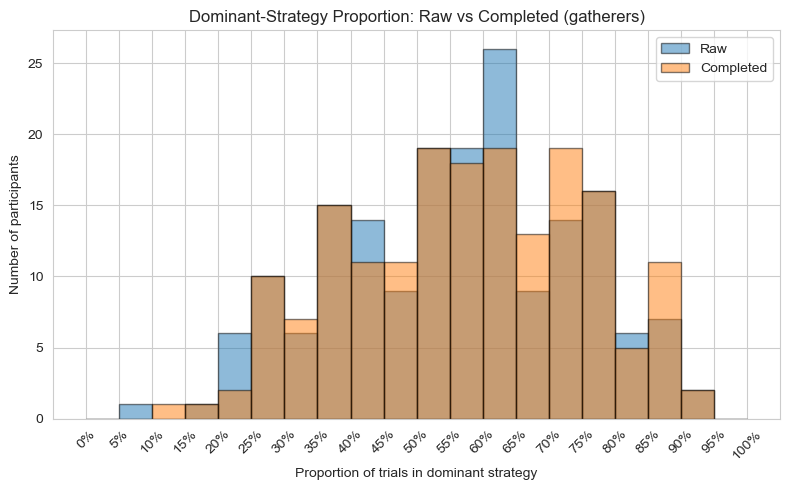

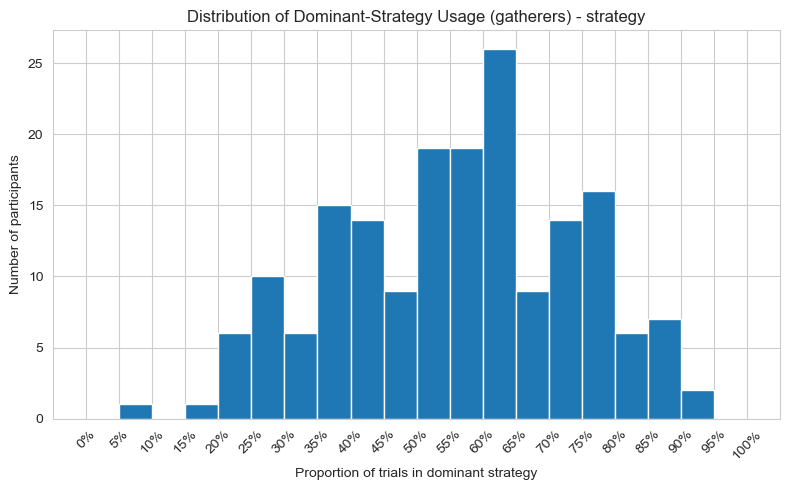

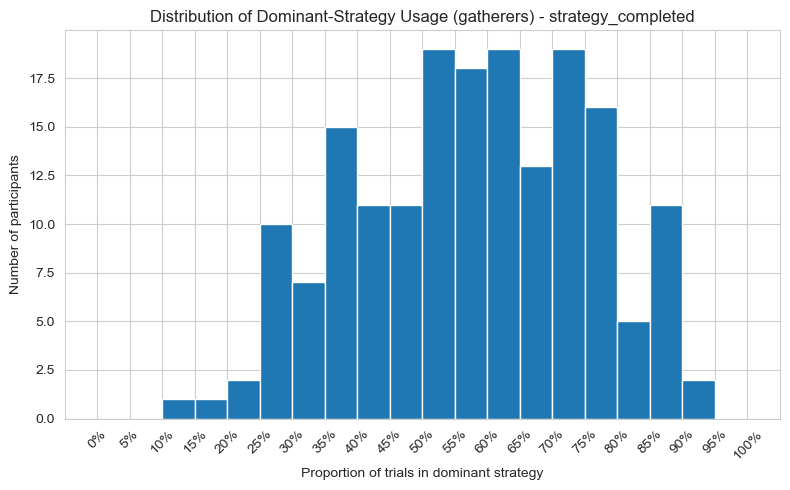

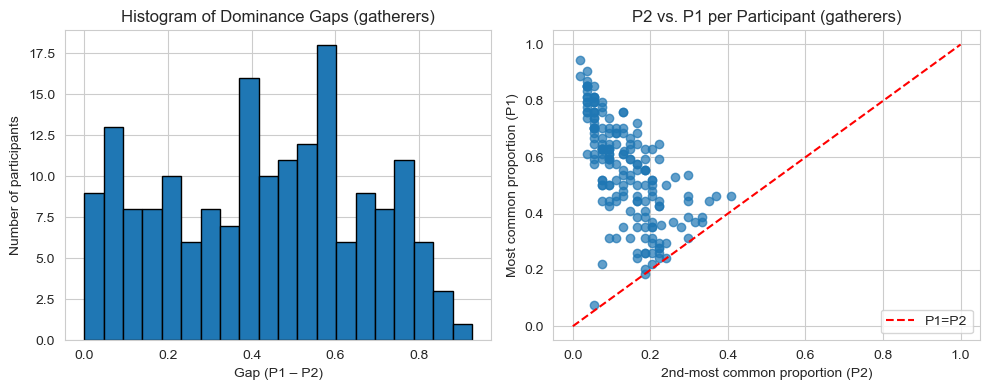

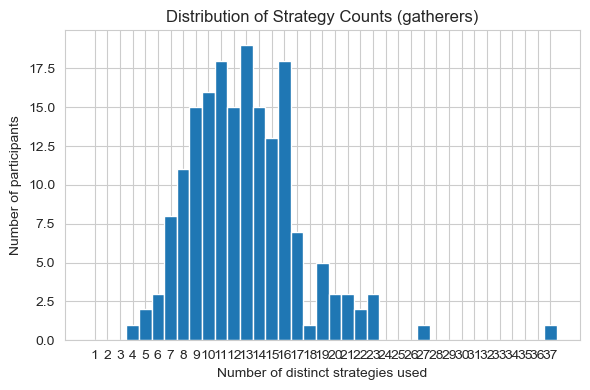

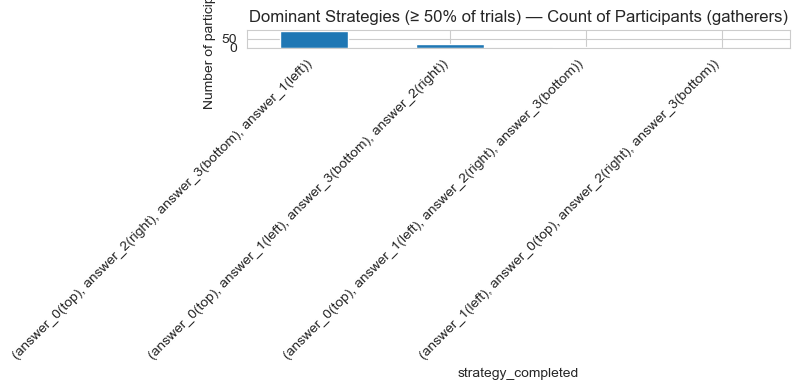

{'participants': 180, 'mean_raw': 0.5239168413696715, 'mean_completed': 0.5498427672955974, 'mean_delta': 0.02592592592592593, 'raw_≥50%': 55.00000000000001, 'comp_≥50%': 60.55555555555555, 'changed_label_n': 0, 'changed_label_pct': 0.0, 'mean_seq_pct_changed': 7.170781893004115, 'median_seq_pct_changed': 5.555555555555555}
{'participants': 180, 'mean_raw': 0.5582828635763646, 'mean_completed': 0.5772206693066232, 'mean_delta': 0.018937805730258557, 'raw_≥50%': 65.55555555555556, 'comp_≥50%': 67.77777777777779, 'changed_label_n': 4, 'changed_label_pct': 2.2222222222222223, 'mean_seq_pct_changed': 5.03261122757978, 'median_seq_pct_changed': 3.7037037037037033}


In [5]:
strategy_results = V.run_all_strategy_plots(
    hunters=hunters,
    gatherers=gatherers,
    kind="location",
    window_len=4,
    threshold=0.5,
    output_root="plots/strategies",
    save=True,
)
print(strategy_results["hunters"]["before_after_summary"])
print(strategy_results["gatherers"]["before_after_summary"])